In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2022-11-19 21:20:58.410599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 21:20:58.485052: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2022-11-19 21:21:00.615770: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 10s 22ms/step - loss: 0.3764 - accuracy: 0.8835 - val_loss: 0.0854 - val_accuracy: 0.9767
Epoch 2/15
422/422 [==============================] - 9s 22ms/step - loss: 0.1168 - accuracy: 0.9649 - val_loss: 0.0575 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0880 - accuracy: 0.9731 - val_loss: 0.0470 - val_accuracy: 0.9880
Epoch 4/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0765 - accuracy: 0.9765 - val_loss: 0.0434 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0674 - accuracy: 0.9789 - val_loss: 0.0386 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 10s 23ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 0.0347 - val_accuracy: 0.9913
Epoch 7/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.0357 - val_accuracy: 0.98

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026096682995557785
Test accuracy: 0.9907000064849854


1

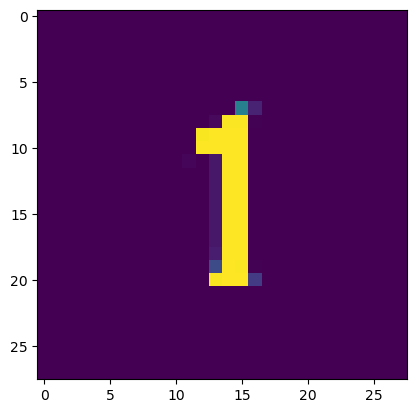

In [23]:
tsimage = plt.imread('./test_images/1.jpg')
tsimage = tsimage / 255
tsimage = 1 - tsimage
tsimage = tf.image.rgb_to_grayscale(tsimage, name=None)
tsimage = tf.image.resize(tsimage, (28, 28))

plt.imshow(tsimage)

tsimage = np.expand_dims(tsimage, 0)
np.argmax(model(tsimage))

In [19]:
model.save('mnist_model_cnn.hdf', save_format="h5")